In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from tqdm import tqdm_notebook

import json

In [2]:
exp_data = pd.read_csv('../data/features/exp_years.csv')
benefits = pd.read_csv('../data/features/benefits.csv')
dep_data = pd.read_csv('../data/features/dep_features.csv')
luch_data = pd.read_csv('../data/features/luch_data.csv')
mnogodet_data = pd.read_csv('../data/features/mnogodet_data.csv')
opekun_data = pd.read_csv('../data/features/opekun_data.csv')

with open('../data/features/fired.json', 'r') as f:
    fired_users = json.loads(f.read())

In [3]:
exp_data.head()

sibur_exp_years     department      user_id             birthday  \
0        18.493379  Озерный город  433602817.0  1971-08-19 00:00:00   
1        14.916667  Озерный город  433350763.0  1957-01-30 00:00:00   
2         7.836073  Озерный город  433579962.0  1984-10-25 00:00:00   
3         0.140868  Озерный город  433602516.0  1970-06-12 00:00:00   
4        14.916667  Озерный город  433417399.0  1975-03-23 00:00:00   

   Вдовец (вдова)  Никогда не состоял (не состояла) в браке  \
0               0                                         0   
1               0                                         0   
2               0                                         0   
3               0                                         0   
4               0                                         1   

   Разведен (разведена)  Состоит в зарегистрированном браке  \
0                     0                                   1   
1                     0                                   1   
2                     0                                   1   
3                     0                                   1   
4                     0                                   0   

   Состоит в незарегистрированном браке  одинокая мать  
0                                     0              0  
1                                     0              0  
2                                     0              0  
3                                     0              0  
4                                     0              0

In [4]:
user_features = {}

for index, row in tqdm_notebook(exp_data.iterrows()):
    user_features[int(row.user_id)] = {
        'exp_years': row.sibur_exp_years,
        'department': row.department,
        'age': datetime.now().year - datetime.strptime(row.birthday.split(' ')[0], '%Y-%m-%d').year,
        'widow': row['Вдовец (вдова)'],
        'no_mirrage': row['Никогда не состоял (не состояла) в браке'],
        'divorced': row['Разведен (разведена)'],
        'of_mirrage': row['Состоит в зарегистрированном браке'],
        'unof_mirrage': row['Состоит в незарегистрированном браке'],
        'lone_mother': row['одинокая мать']
    }

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [5]:
for user in user_features.keys():
    user_features[user]['good_job'] = 0
    user_features[user]['holiday'] = 0
    user_features[user]['motivation'] = 0

counter = 0

for index, row in benefits.iterrows():
    try:
        user_features[row.user_id]['good_job'] = row.good_job
        user_features[row.user_id]['holiday'] = row.holiday
        user_features[row.user_id]['motivation'] = row.motivation
    except:
        user_features[row.user_id] = {
            'exp_years': 5.763698630136986,
            'department': 'Синие горы',
            'age': 38.0,
            'widow': 0.0,
            'no_mirrage': 0.0,
            'divorced': 0.0,
            'of_mirrage': 0.0,
            'unof_mirrage': 0.0,
            'lone_mother': 0.0,
            'good_job': row.good_job,
            'holiday': row.holiday,
            'motivation': row.motivation
        }
        
        continue

In [6]:
for user in user_features.keys():
    user_features[user]['prize_1'] = 0
    user_features[user]['prize_2'] = 0
    user_features[user]['prize_3'] = 0
    user_features[user]['prize_4'] = 0
    user_features[user]['prize_5'] = 0
    user_features[user]['prize_6'] = 0
    user_features[user]['prize_7'] = 0

counter = 0

for index, row in luch_data.iterrows():
    try:
        user_features[row.user_id]['prize_1'] = row.prize_1
        user_features[row.user_id]['prize_2'] = row.prize_2
        user_features[row.user_id]['prize_3'] = row.prize_3
        user_features[row.user_id]['prize_4'] = row.prize_4
        user_features[row.user_id]['prize_5'] = row.prize_5
        user_features[row.user_id]['prize_6'] = row.prize_6
        user_features[row.user_id]['prize_7'] = row.prize_7
    except:
        counter += 1
        continue

In [7]:
for user in user_features.keys():
    user_features[user]['own_child_mean_girl_age'] = 0
    user_features[user]['own_child_mean_boy_age'] = 0
    user_features[user]['own_child_num_girl'] = 0
    user_features[user]['own_child_num_boy'] = 0

counter = 0

for user, group in tqdm_notebook(mnogodet_data.groupby('user_id')):
    for ct, cgroup in group.groupby('child_type'):
        ages = [datetime.now().year - datetime.strptime(v, '%d.%m.%Y').year for v in cgroup.child_birth_date]
        
        try:
            if ct == 1:
                user_features[user]['own_child_mean_girl_age'] = np.mean(ages)
                user_features[user]['own_child_num_girl'] = len(ages)
            else:
                user_features[user]['own_child_mean_boy_age'] = np.mean(ages)
                user_features[user]['own_child_num_boy'] = len(ages)
        except:
            counter += 1
            continue

HBox(children=(IntProgress(value=0, max=20352), HTML(value='')))

In [8]:
for user in user_features.keys():
    user_features[user]['opek_child_mean_girl_age'] = 0
    user_features[user]['opek_child_mean_boy_age'] = 0
    user_features[user]['opek_child_num_girl'] = 0
    user_features[user]['opek_child_num_boy'] = 0

counter = 0

for user, group in tqdm_notebook(opekun_data.groupby('user_id')):
    for ct, cgroup in group.groupby('child_type'):
        ages = [datetime.now().year - datetime.strptime(v, '%Y-%m-%d').year for v in cgroup.child_birth_date]
        
        try:
            if ct == 1:
                user_features[user]['opek_child_mean_girl_age'] = np.mean(ages)
                user_features[user]['opek_child_num_girl'] = len(ages)
            else:
                user_features[user]['opek_child_mean_boy_age'] = np.mean(ages)
                user_features[user]['opek_child_num_boy'] = len(ages)
        except:
            counter += 1
            continue

HBox(children=(IntProgress(value=0, max=33), HTML(value='')))

In [9]:
def get_stats(arr):
    return [
        np.min(arr),
        np.max(arr),
        np.mean(arr),
        np.std(arr),
        np.percentile(arr, 25),
        np.percentile(arr, 50),
        np.percentile(arr, 75)
    ]

In [10]:
keys = {
    'user_id': []
}

for k in user_features[433350763].keys():
    keys[k] = []
    
for user in user_features.keys():
    keys['user_id'].append(user)
    for k in keys.keys():
        if k == 'user_id':
            continue
        
        keys[k].append(user_features[user][k])

In [11]:
data = pd.DataFrame(keys)

In [12]:
fired_col = []

for user in data.user_id.values:
    if user in fired_users:
        fired_col.append(1)
    else:
        fired_col.append(0)
        
data['fired'] = fired_col

In [13]:
data.fired.sum()

157

In [14]:
dep_features = {}

for dep, group in tqdm_notebook(data.groupby('department')):
    age_stats = get_stats(group.age)
    exp_stats = get_stats(group.exp_years)
    
    dep_features[dep] = {
        'min_dep_age': age_stats[0],
        'max_dep_age': age_stats[1],
        'mean_dep_age': age_stats[2],
        'std_dep_age': age_stats[3],
        'p25_dep_age': age_stats[4],
        'p50_dep_age': age_stats[5],
        'p75_dep_age': age_stats[6],
        'min_dep_exp': exp_stats[0],
        'max_dep_exp': exp_stats[1],
        'mean_dep_exp': exp_stats[2],
        'std_dep_exp': exp_stats[3],
        'p25_dep_exp': exp_stats[4],
        'p50_dep_exp': exp_stats[5],
        'p75_dep_exp': exp_stats[6],
        'mean_widow': group.widow.mean(),
        'mean_no_mirrage': group.no_mirrage.mean(),
        'mean_divorced': group.divorced.mean(),
        'mean_of_mirrage': group.of_mirrage.mean(),
        'mean_unof_mirrage': group.unof_mirrage.mean(),
        'mean_lone_mother': group.lone_mother.mean(),
        'mean_good_job': group.good_job.mean(),
        'mean_holiday': group.holiday.mean(),
        'mean_motivation': group.motivation.mean(),
        'mean_prize_1': group.prize_1.mean(),
        'mean_prize_2': group.prize_2.mean(),
        'mean_prize_3': group.prize_3.mean(),
        'mean_prize_4': group.prize_4.mean(),
        'mean_prize_5': group.prize_5.mean(),
        'mean_prize_6': group.prize_6.mean(),
        'mean_prize_7': group.prize_7.mean()
    }

HBox(children=(IntProgress(value=0, max=32), HTML(value='')))

In [15]:
dep_df = {}

for key in dep_features['Альдераан'].keys():
    dep_df[key] = []
    
for d in tqdm_notebook(data.department.values):
    for k in dep_df.keys():
        dep_df[k].append(dep_features[d][k])

HBox(children=(IntProgress(value=0, max=26821), HTML(value='')))

In [16]:
dep_df = pd.DataFrame(dep_df)

In [66]:
final_data = pd.concat([data, dep_df], axis=1)

In [18]:
test_data = pd.concat([data, dep_df], axis=1)

In [19]:
del test_data['fired']

In [20]:
del test_data['department']

In [21]:
user_all_features = {}

for index, row in tqdm_notebook(test_data.iterrows()):
    user_all_features[row.user_id] = {}
    
    for c in test_data.columns:
        if c == 'user_id':
            continue
            
        user_all_features[row.user_id][c] = row[c]

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [22]:
user_all_features[433602817]

{'age': 48.0,
 'divorced': 0.0,
 'exp_years': 18.493378995433787,
 'good_job': 0.0,
 'holiday': 0.0,
 'lone_mother': 0.0,
 'max_dep_age': 73.0,
 'max_dep_exp': 24.42214611872146,
 'mean_dep_age': 43.93860147811257,
 'mean_dep_exp': 11.181239340534397,
 'mean_divorced': 0.11881750994883457,
 'mean_good_job': 0.017055144968732235,
 'mean_holiday': 0.06083001705514497,
 'mean_lone_mother': 0.009664582148948267,
 'mean_motivation': 0.0,
 'mean_no_mirrage': 0.18078453666856167,
 'mean_of_mirrage': 0.6679931779420125,
 'mean_prize_1': 0.0,
 'mean_prize_2': 0.0,
 'mean_prize_3': 0.0,
 'mean_prize_4': 0.0,
 'mean_prize_5': 0.0,
 'mean_prize_6': 0.0,
 'mean_prize_7': 0.0,
 'mean_unof_mirrage': 0.010801591813530414,
 'mean_widow': 0.01137009664582149,
 'min_dep_age': 20.0,
 'min_dep_exp': 0.03287671232876712,
 'motivation': 0.0,
 'no_mirrage': 0.0,
 'of_mirrage': 1.0,
 'opek_child_mean_boy_age': 0.0,
 'opek_child_mean_girl_age': 0.0,
 'opek_child_num_boy': 0.0,
 'opek_child_num_girl': 0.0,
 'own

In [23]:
with open('../data/user_features.json', 'w') as f:
    f.write(json.dumps(user_all_features))

In [24]:
final_data.fired.sum()

157

In [72]:
users_for_range = pd.read_csv('../data/user_change.csv').user_id.values

In [77]:
final_data = final_data[~final_data.user_id.isin(users_for_range)]

In [79]:
del final_data['department']

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [81]:
y = final_data.fired
del final_data['fired']
del final_data['user_id']

In [82]:
model = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11, 15, 19, 24],
    'min_samples_split': [3, 5, 7, 10, 15, 20, 25]
}

gs = GridSearchCV(model, params, cv=5, scoring='f1', verbose=3, n_jobs=8)
gs.fit(final_data, y)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    7.6s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   12.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:   20.7s
[Parallel(n_jobs=8)]: Done 420 out of 420 | elapsed:   27.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 7, 11, 15, 19, 24], 'min_samples_split': [3, 5, 7, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=3)

In [83]:
gs.best_score_

0.241098966924525

# imbalance methods

In [84]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [85]:
scaler = MinMaxScaler()
scaler.fit(final_data)
sc_data = scaler.transform(final_data)

/Users/aleksandrkondraskin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [86]:
pd_sc_data = {}

for i in range(len(final_data.columns)):
    pd_sc_data[final_data.columns[i]] = sc_data.T[i]
    
pd_sc_data = pd.DataFrame(pd_sc_data)

In [87]:
pd_sc_data.head()

exp_years       age  widow  no_mirrage  divorced  of_mirrage  unof_mirrage  \
0   0.383902  0.492063    0.0         0.0       0.0         1.0           0.0   
1   0.309653  0.714286    0.0         0.0       0.0         1.0           0.0   
2   0.162668  0.285714    0.0         0.0       0.0         1.0           0.0   
3   0.002924  0.507937    0.0         0.0       0.0         1.0           0.0   
4   0.309653  0.428571    0.0         1.0       0.0         0.0           0.0   

   lone_mother  good_job  holiday      ...       mean_good_job  mean_holiday  \
0          0.0  0.000000      0.0      ...            0.137089      0.609784   
1          0.0  0.006897      0.0      ...            0.137089      0.609784   
2          0.0  0.000000      0.0      ...            0.137089      0.609784   
3          0.0  0.000000      0.0      ...            0.137089      0.609784   
4          0.0  0.006897      0.0      ...            0.137089      0.609784   

   mean_motivation  mean_prize_1  mean_prize_2  mean_prize_3  mean_prize_4  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              0.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   

   mean_prize_5  mean_prize_6  mean_prize_7  
0           0.0           0.0           0.0  
1           0.0           0.0           0.0  
2           0.0           0.0           0.0  
3           0.0           0.0           0.0  
4           0.0           0.0           0.0  

[5 rows x 56 columns]

In [88]:
pd_sc_data.shape

(22683, 56)

In [89]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(pd_sc_data, y, test_size=0.2)

In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [91]:
model = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11, 15, 19, 24],
    'min_samples_split': [3, 5, 7, 10, 15, 20, 25]
}

gs = GridSearchCV(model, params, cv=5, scoring='f1', verbose=3, n_jobs=8)
gs.fit(Xtrain, Ytrain)

print(gs.best_score_)
print(gs.best_params_)
print(classification_report(Ytest, gs.predict(Xtest)))
print('roc-auc: ', roc_auc_score(Ytest, [v[1] for v in gs.predict_proba(Xtest)]))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:   10.3s


0.665782023450143
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 7}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4510
           1       0.70      0.70      0.70        27

   micro avg       1.00      1.00      1.00      4537
   macro avg       0.85      0.85      0.85      4537
weighted avg       1.00      1.00      1.00      4537

roc-auc:  0.9228791984889546


[Parallel(n_jobs=8)]: Done 420 out of 420 | elapsed:   14.7s finished


In [92]:
from imblearn.over_sampling import SMOTE, ADASYN

In [93]:
sampler = ADASYN()
sampler.fit(Xtrain, Ytrain)
Xres, Yres = sampler.fit_resample(Xtrain, Ytrain)

In [94]:
model = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11, 15, 19, 24],
    'min_samples_split': [3, 5, 7, 10, 15, 20, 25]
}

gs = GridSearchCV(model, params, cv=5, scoring='f1', verbose=3, n_jobs=8)
gs.fit(Xres, Yres)

print(gs.best_score_)
print(gs.best_params_)
print(classification_report(Ytest, gs.predict(Xtest)))
print('roc-auc: ', roc_auc_score(Ytest, [v[1] for v in gs.predict_proba(Xtest)]))

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   13.2s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:   33.4s
[Parallel(n_jobs=8)]: Done 420 out of 420 | elapsed:   50.8s finished


0.9756362241163232
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 3}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4510
           1       0.35      0.93      0.51        27

   micro avg       0.99      0.99      0.99      4537
   macro avg       0.68      0.96      0.75      4537
weighted avg       1.00      0.99      0.99      4537

roc-auc:  0.9573499219840684


In [95]:
sampler = SMOTE()
sampler.fit(Xtrain, Ytrain)
Xres, Yres = sampler.fit_resample(Xtrain, Ytrain)

In [96]:
model = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11, 15, 19, 24],
    'min_samples_split': [3, 5, 7, 10, 15, 20, 25]
}

gs = GridSearchCV(model, params, cv=5, scoring='f1', verbose=3, n_jobs=8)
gs.fit(Xres, Yres)

print(gs.best_score_)
print(gs.best_params_)
print(classification_report(Ytest, gs.predict(Xtest)))
print('roc-auc: ', roc_auc_score(Ytest, [v[1] for v in gs.predict_proba(Xtest)]))

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   10.7s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:   25.1s


0.9968160614181274
{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4510
           1       0.50      0.93      0.65        27

   micro avg       0.99      0.99      0.99      4537
   macro avg       0.75      0.96      0.82      4537
weighted avg       1.00      0.99      0.99      4537

roc-auc:  0.9791368974295803


[Parallel(n_jobs=8)]: Done 420 out of 420 | elapsed:   37.5s finished


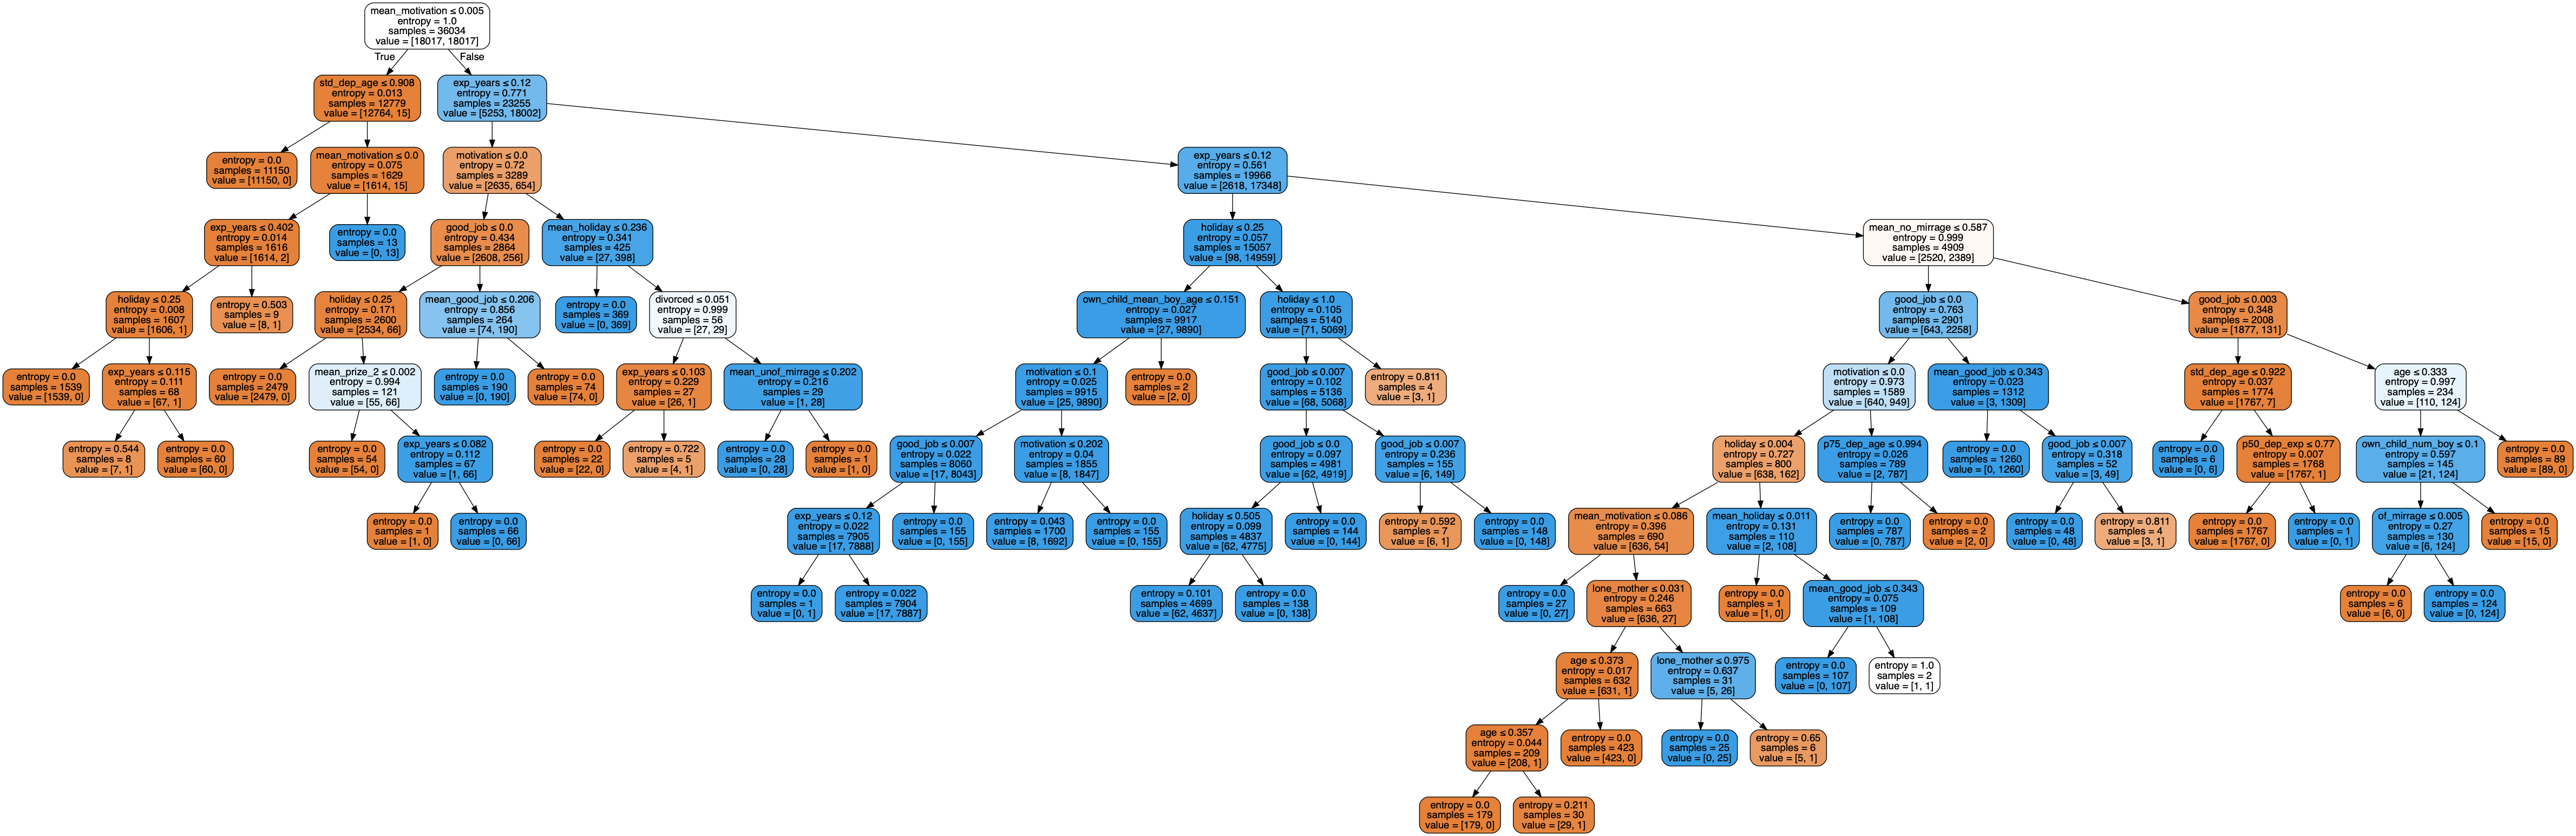

In [97]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

best_model = gs.best_estimator_

dot_data = StringIO()
export_graphviz(best_model, feature_names=final_data.columns, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [98]:
final_data.head()

exp_years   age  widow  no_mirrage  divorced  of_mirrage  unof_mirrage  \
0  18.493379  48.0    0.0         0.0       0.0         1.0           0.0   
1  14.916667  62.0    0.0         0.0       0.0         1.0           0.0   
2   7.836073  35.0    0.0         0.0       0.0         1.0           0.0   
3   0.140868  49.0    0.0         0.0       0.0         1.0           0.0   
4  14.916667  44.0    0.0         1.0       0.0         0.0           0.0   

   lone_mother  good_job  holiday      ...       mean_good_job  mean_holiday  \
0          0.0         0        0      ...            0.017055       0.06083   
1          0.0         1        0      ...            0.017055       0.06083   
2          0.0         0        0      ...            0.017055       0.06083   
3          0.0         0        0      ...            0.017055       0.06083   
4          0.0         1        0      ...            0.017055       0.06083   

   mean_motivation  mean_prize_1  mean_prize_2  mean_prize_3  mean_prize_4  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              0.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   

   mean_prize_5  mean_prize_6  mean_prize_7  
0           0.0           0.0           0.0  
1           0.0           0.0           0.0  
2           0.0           0.0           0.0  
3           0.0           0.0           0.0  
4           0.0           0.0           0.0  

[5 rows x 56 columns]

In [99]:
final_data.columns

Index(['exp_years', 'age', 'widow', 'no_mirrage', 'divorced', 'of_mirrage',
       'unof_mirrage', 'lone_mother', 'good_job', 'holiday', 'motivation',
       'prize_1', 'prize_2', 'prize_3', 'prize_4', 'prize_5', 'prize_6',
       'prize_7', 'own_child_mean_girl_age', 'own_child_mean_boy_age',
       'own_child_num_girl', 'own_child_num_boy', 'opek_child_mean_girl_age',
       'opek_child_mean_boy_age', 'opek_child_num_girl', 'opek_child_num_boy',
       'min_dep_age', 'max_dep_age', 'mean_dep_age', 'std_dep_age',
       'p25_dep_age', 'p50_dep_age', 'p75_dep_age', 'min_dep_exp',
       'max_dep_exp', 'mean_dep_exp', 'std_dep_exp', 'p25_dep_exp',
       'p50_dep_exp', 'p75_dep_exp', 'mean_widow', 'mean_no_mirrage',
       'mean_divorced', 'mean_of_mirrage', 'mean_unof_mirrage',
       'mean_lone_mother', 'mean_good_job', 'mean_holiday', 'mean_motivation',
       'mean_prize_1', 'mean_prize_2', 'mean_prize_3', 'mean_prize_4',
       'mean_prize_5', 'mean_prize_6', 'mean_prize_7'],
     

In [100]:
normal_columns = [
    'exp_years',
    'good_job',
    'holiday',
    'motivation',
    'prize_1',
    'prize_2',
    'prize_3',
    'prize_4',
    'prize_5',
    'prize_6',
    'prize_7'
]

new_normal_data = {}

for c in normal_columns:
    new_normal_data[c] = final_data[c].values
    
new_normal_data = pd.DataFrame(new_normal_data)

In [101]:
second_scaler = MinMaxScaler()
second_scaler.fit(new_normal_data)
second_sc_data = second_scaler.transform(new_normal_data)

/Users/aleksandrkondraskin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [102]:
second_pd_sc_data = {}

for i in range(len(new_normal_data.columns)):
    second_pd_sc_data[new_normal_data.columns[i]] = second_sc_data.T[i]
    
second_pd_sc_data = pd.DataFrame(second_pd_sc_data)

In [103]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(second_pd_sc_data, y, test_size=0.2)

In [104]:
sampler = SMOTE()
sampler.fit(Xtrain, Ytrain)
Xres, Yres = sampler.fit_resample(Xtrain, Ytrain)

model = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11, 15, 19, 24],
    'min_samples_split': [3, 5, 7, 10, 15, 20, 25]
}

gs2 = GridSearchCV(model, params, cv=5, scoring='f1', verbose=3, n_jobs=8)
gs2.fit(Xres, Yres)

print(gs2.best_score_)
print(gs2.best_params_)
print(classification_report(Ytest, gs2.predict(Xtest)))
print('roc-auc: ', roc_auc_score(Ytest, [v[1] for v in gs2.predict_proba(Xtest)]))

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.4s


0.9861629800923165
{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 25}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4511
           1       0.18      0.88      0.30        26

   micro avg       0.98      0.98      0.98      4537
   macro avg       0.59      0.93      0.65      4537
weighted avg       0.99      0.98      0.98      4537

roc-auc:  0.9659678051941409


[Parallel(n_jobs=8)]: Done 420 out of 420 | elapsed:    9.2s finished


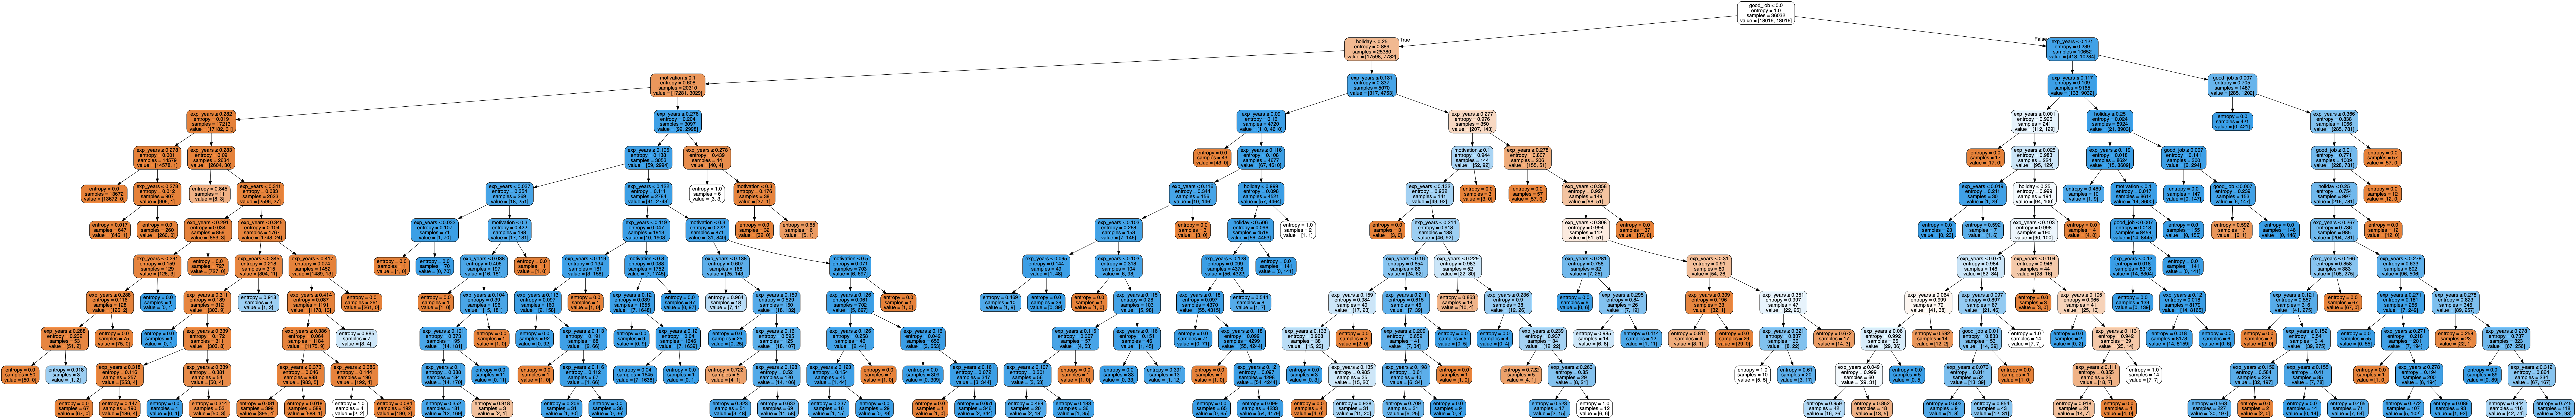

In [105]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

best_model = gs2.best_estimator_

dot_data = StringIO()
export_graphviz(best_model, feature_names=new_normal_data.columns, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [106]:
import pickle

In [107]:
with open('../models/big_model_scoring', 'wb') as f:
    f.write(pickle.dumps(gs.best_estimator_))

In [108]:
with open('../models/small_model_scoring', 'wb') as f:
    f.write(pickle.dumps(gs2.best_estimator_))